# Customer Churn Prediction
memprediksi customer yang akan berhenti berlangganan dari perusahaan

terinspirasi langsung dari pada pengamatan bisnis industri hiburan seperti JKT48
- mengapa ada customer yang bertahan lama, ada juga memilih berhenti langganan
- juga terjadi pada bisnis lain mulai dari usaha kecil, toko-toko hingga usaha korporasi

pertama kali pernah bertemu case study pada saat mengerjakan kursus dari DQLab Data Science

## Persiapan
- import library untuk pengolahan data dengan pandas dan numpy, visualisasi data dengan matplotlib dan seaborn
- library untuk preprocess dengan Label Encoder dan MinMax Scaler dari sklearn, begitu juga train test split untuk membagi data
- library untuk pengukuran performa model dari accuracy_score, classification_report dan confusion matrix dr sklearn
- library untuk model klasifikasi Logistic Regression, Decision Tree dan Random Forest dari sklearn
- sisanya library warning untuk filter warnings

In [5]:
# library untuk pengolahan data dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk preprocess, pembagian data, dan pengukuran performa model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# library untuk machine learning classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# library untuk filter warning, agar bisa mengabaikan warning
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

In [6]:
# baca data pake head
ecommerce_df = pd.read_csv('e_commerce_dataset.csv')
ecommerce_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


secara keseluruhan data terdiri dari 5630 baris dan 20 baris

In [9]:
# liat info data dan shape data
print(ecommerce_df.shape)
ecommerce_df.info()

(5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberO

bagi data asli menjadi 
- data usecase sebanyak 4000 baris data  untuk modelling 
- 1630 baris data realcase tanpa kolom label Churn untuk model inference

In [285]:
# bagi data jadi usecase 4000 baris teratas dan realcase sisanya
usecase_df = ecommerce_df.loc[:3999]
realcase_df = ecommerce_df.loc[4000:, ecommerce_df.columns!='Churn']

In [19]:
usecase_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [20]:
usecase_df.shape

(4000, 20)

informasi dari dataset
- terdiri dari 3 tipe data : `int64`, `float64`, `object`
- terdapat data yang null meskipun kurang dari 300 baris pada 7 kolom

In [21]:
# informasi dari dataset
usecase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4000 non-null   int64  
 1   Churn                        4000 non-null   int64  
 2   Tenure                       3736 non-null   float64
 3   PreferredLoginDevice         4000 non-null   object 
 4   CityTier                     4000 non-null   int64  
 5   WarehouseToHome              3749 non-null   float64
 6   PreferredPaymentMode         4000 non-null   object 
 7   Gender                       4000 non-null   object 
 8   HourSpendOnApp               3745 non-null   float64
 9   NumberOfDeviceRegistered     4000 non-null   int64  
 10  PreferedOrderCat             4000 non-null   object 
 11  SatisfactionScore            4000 non-null   int64  
 12  MaritalStatus                4000 non-null   object 
 13  NumberOfAddress   

deskripsi statistik pada dataset, meliputi perhitungan statistik mulai dari mean, min, max, quartile (termasuk median), hingga data deviasi

In [22]:
# liat deskripsi statistik pada data numerik secara default
usecase_df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,4000.000000,4000.000000,3736.000000,4000.000000,3749.000000,3745.000000,4000.000000,4000.000000,4000.00000,4000.000000,3845.000000,3796.000000,3828.000000,3829.000000,4000.000000
mean,52000.500000,0.172500,10.073340,1.653250,15.388103,2.724967,3.491250,3.112000,4.02525,0.286000,15.482445,1.547155,2.819488,4.347088,172.286750
std,1154.844867,0.377862,8.572674,0.915273,8.454321,0.696587,0.999837,1.329811,2.59823,0.451946,3.652222,1.907931,2.952293,3.652404,49.181178
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.00000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51000.750000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.00000,0.000000,13.000000,0.000000,1.000000,2.000000,138.000000
50%,52000.500000,0.000000,9.000000,1.000000,13.000000,3.000000,3.000000,3.000000,3.00000,0.000000,14.000000,1.000000,2.000000,3.000000,157.000000
75%,53000.250000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,5.00000,1.000000,18.000000,2.000000,3.000000,7.000000,193.000000
max,54000.000000,1.000000,60.000000,3.000000,126.000000,4.000000,6.000000,5.000000,22.00000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


deksripsi statistik pada kolom yang tipe data string sebagai kategorikal atau object

In [23]:
# liat deskripsi statistik pada data kategorikal atau object
usecase_df.describe(include='object')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,4000,4000,4000,4000,4000
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,1774,1643,2399,1447,1871


memeriksa kebersihan data meliputi jumlah data yang hilang dan duplikat

kemudian di liat kembali baris data teratas ini mulai dari tipe data, hingga isi data meliputi mean, min dan maxnya 

In [26]:
# liat jumlah data null value dan urutkan berdasarkan jumlah tertinggi
usecase_df.isnull().sum().sort_values(ascending=False)

Tenure                         264
HourSpendOnApp                 255
WarehouseToHome                251
CouponUsed                     204
OrderCount                     172
DaySinceLastOrder              171
OrderAmountHikeFromlastYear    155
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

cek data yang duplikat namun ternyata tidak ada yang duplikat

In [25]:
# liat jumlah duplicate data
usecase_df[usecase_df.duplicated()].count()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Tipe data yang terdapat nilai null merupakan numerik yaitu int dan float

In [77]:
null_data = usecase_df.isnull().sum().sort_values(ascending=False)

print(f"{'[Columns]':<29} {'[Data Type]'} {'[missing values]':>15}")
for i,row in null_data.head(7).iteritems():
    print(f'{i:<30} {usecase_df[i].dtype} {row:>10} ')

[Columns]                     [Data Type] [missing values]
Tenure                         float64        264 
HourSpendOnApp                 float64        255 
WarehouseToHome                float64        251 
CouponUsed                     float64        204 
OrderCount                     float64        172 
DaySinceLastOrder              float64        171 
OrderAmountHikeFromlastYear    float64        155 


melihat nilai mean, min dan max dari kolom yang terdapat data kosong terbanyak

In [94]:
null_columns = ['Tenure', 'HourSpendOnApp', 'WarehouseToHome', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear']

for nulcol in null_columns:
    print(f"""{str(nulcol).upper()}
Mean : {usecase_df[nulcol].mean():.2f},      Max : {usecase_df[nulcol].max():.0f} Min : {usecase_df[nulcol].min():.0f}\n""")

TENURE
Mean : 10.07,      Max : 60 Min : 0

HOURSPENDONAPP
Mean : 2.72,      Max : 4 Min : 0

WAREHOUSETOHOME
Mean : 15.39,      Max : 126 Min : 5

COUPONUSED
Mean : 1.55,      Max : 16 Min : 0

ORDERCOUNT
Mean : 2.82,      Max : 16 Min : 1

DAYSINCELASTORDER
Mean : 4.35,      Max : 46 Min : 0

ORDERAMOUNTHIKEFROMLASTYEAR
Mean : 15.48,      Max : 26 Min : 11



data cleansing
- cuma ada data null value (data numerik float64 semua) replace pake 0.0 aja
- karena kalau datanya kosong atau hilang artinya tidak valid, maka diisi 0 aja

In [286]:
# replace null value with 0
for nulcol in null_columns:
    usecase_df[nulcol] = usecase_df[nulcol].fillna(0)

menyunting kolom ID Customer agar menjadi string, menambahkan 4 huruf pertama pada digit 

yaitu huruf CUST yang menandakan ID ini dari Customer

In [287]:
# menambahkan string CUST didepan digit angka
usecase_df['CustomerID'] = 'CUST' + usecase_df['CustomerID'].astype(str)

mengganti tipe data pada kolom-kolom float yang seharusnya dijadikan int

kolom yg tipe datanya diganti : HourSpendOnApp, CouponUsed, OrderCount

In [288]:
# for col in usecase_df.columns:
#     if usecase_df[col].dtype == 'float64':
#         print(col, usecase_df[col].dtype)
#         print(usecase_df[col].unique())

# mengganti tipe data kolom HourSpendOnApp, CouponUsed, OrderCount
for col in ['HourSpendOnApp', 'CouponUsed', 'OrderCount']:
    # convert yang tadinya float menjadi int
    usecase_df[col] = usecase_df[col].astype(int)

Exploratory Data Analysis

In [289]:
# menghitung jumlah baris data customer yang tidak churn dan yang churn
stay = usecase_df[usecase_df['Churn']==0].shape[0]
left = usecase_df[usecase_df['Churn']==1].shape[0]

# kemudian liat persentasenya
print(f"""Percentage of Remaining Customer : {stay/(stay+left)*100:.2f} % ({stay} Customers)
Percentage of Left Customer      : {left/(stay+left)*100:.2f} % ({left} Customers)""")

Percentage of Remaining Customer : 82.75 % (3310 Customers)
Percentage of Left Customer      : 17.25 % (690 Customers)


pada kolom label, terdapat 3310 baris customer yang menentap dan sisanya 690 telah hengkang

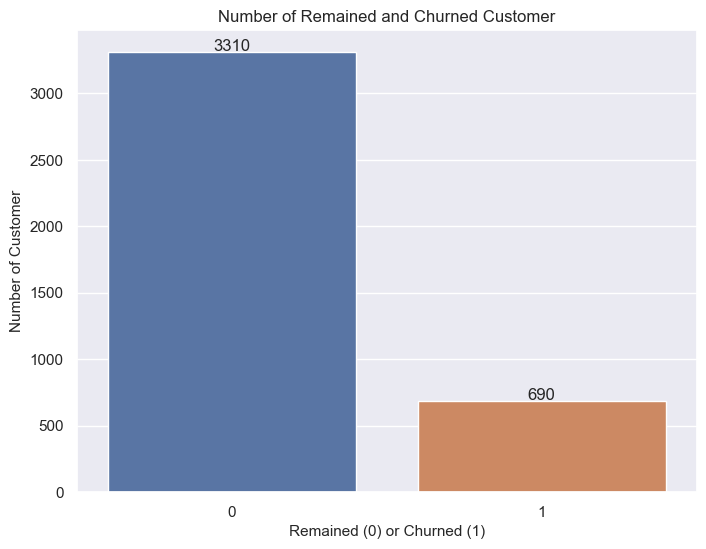

In [209]:
# visualisasi kolom label
plt.figure(figsize=(8,6))
cplot = sns.countplot(usecase_df['Churn'])

# anotasi pada countplot
for cp in cplot.patches:
    cplot.annotate(format(cp.get_height(), '.0f'), (cp.get_x() + cp.get_width() / 2., cp.get_height()),  
                   ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
    
plt.title('Number of Remained and Churned Customer', fontsize=12)
plt.ylabel('Number of Customer', fontsize=11)
plt.xlabel('Remained (0) or Churned (1)', fontsize=11)
plt.show()

pembagian distribusi kolom numerikal dan kategorikal berdasarkan jumlah unique value

makin banyak unique value masuk ke numerikal, makin sedikit masuk ke categorikal

In [137]:
numeric_columns = []
category_columns = []

for col in usecase_df.columns:
    # kecuali kolom CustomerID dan Churn
    if col != 'CustomerID' and col != 'Churn':
        # ditentukan berdasarkan jumlah unique value
        len_uniq = len(usecase_df[col].unique())
        # jika unique value kurang dari 10 maka category
        if len_uniq < 10:
            # print(col, len_uniq, 'This is Categorical')
            category_columns.append(col)
        # jika unique value lebih dari 10 maka numeric
        elif len_uniq > 10:
            # print(col, len_uniq, 'This is Numerical')
            numeric_columns.append(col)

Secara keseluruhan meskipun customer yang stay dan churn jumlahnya berbeda jauh, 
- namun menampilkan urutan yang sama dari tiap categorynya 
- semakin banyak jumlah pelanggan pada kelompok tersebut, semakin besar kemungkinan customer churnnya
- idealnya bagi perusahaan yang baik, category dengan customer terbanyak justru churnnya semakin sedikit

plot data kategorikal mengghunakan chart seaborn catplot
- Berdasarkan Preferensi Device sebagian besar customer suka menggunakan mobile phone
  - namun hal ini tidak berpengaruh pada jumlah customer yang churn, karena ketiganya sama
- Kebanyakan Customer Preffered menggunakan Payment Mode menggunakan Kartu Debit, Kredit dan E-Wallet
  - customer yang churn berasal dari Mode Payment terbanyak yang disebutkan
- kebanyakan customer Prefered Order Category ke laptop, gadget, mobile phone hingga fashion
  - jumlah customer churn terbanyak berasal dari category elektronik dan gadget
  - jumlah churn diikui dari peminat ke-3 yaitu fashion, justru yang paling sedikit
- pada customer yang memberikan Satisfaction Score dari 1 sampai 5
  - customer yang churn kebanyakan yang ngasi score 3 dengan 5, terlihat ironis
  - padahal customer yang score 5 artinya puas dengan layanannya, mungkin ada faktor lain
  - sebaliknya yang ngasih score 1 lebih cenderung stay 
- Meskipun jumlah Customer Churn yang tidak Complaint dan Complaint berbeda tipis, 
  - ini menunjukan customer yang cimplaint lebih mungkin untuk churn
  - dan customer yang tidak complaint kemungkinan besar sudah betah

<Figure size 1000x600 with 0 Axes>

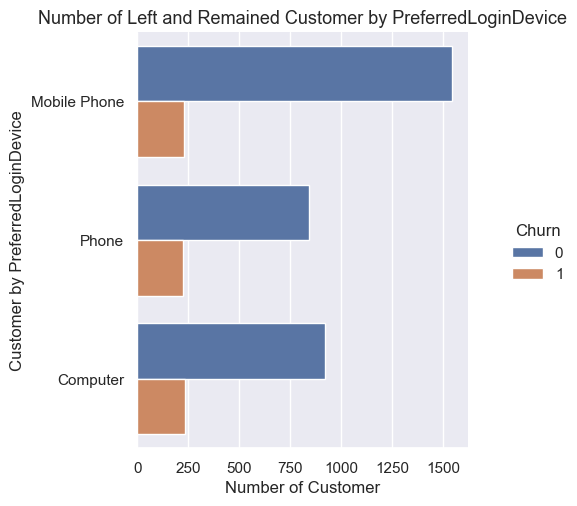

<Figure size 1000x600 with 0 Axes>

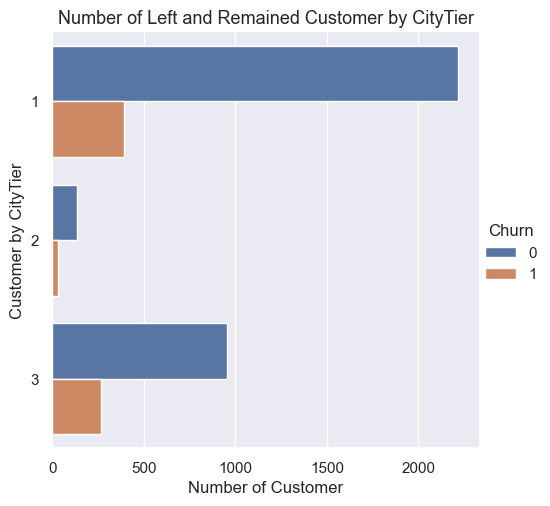

<Figure size 1000x600 with 0 Axes>

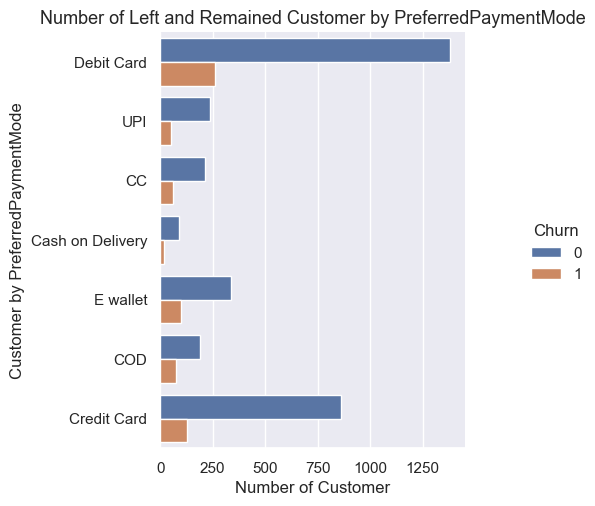

<Figure size 1000x600 with 0 Axes>

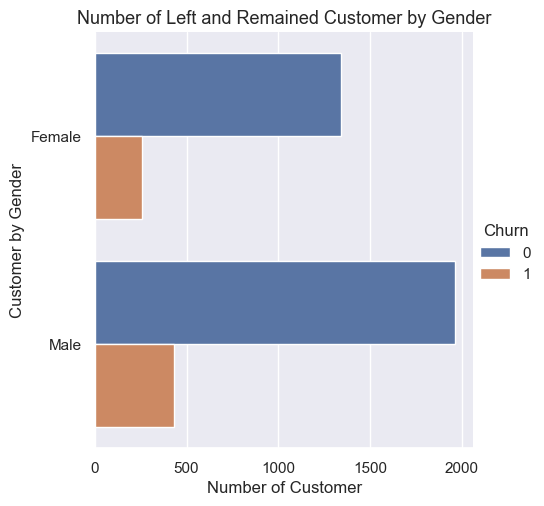

<Figure size 1000x600 with 0 Axes>

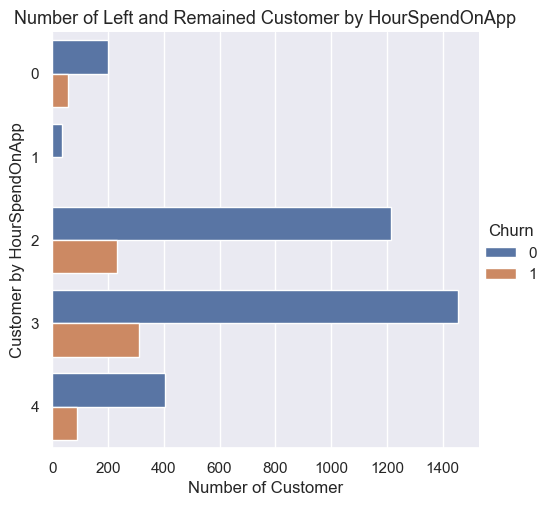

<Figure size 1000x600 with 0 Axes>

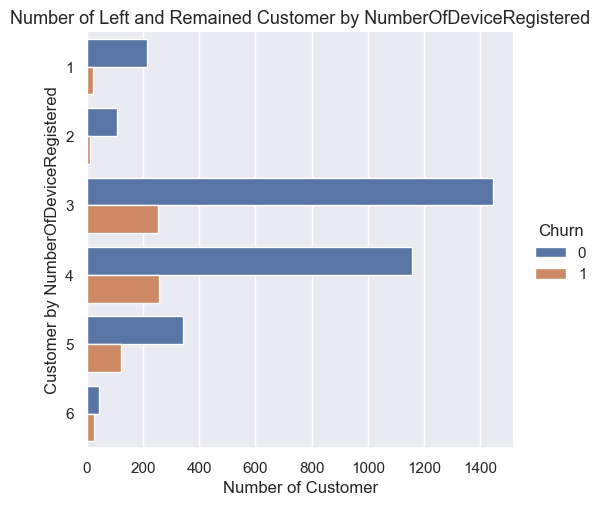

<Figure size 1000x600 with 0 Axes>

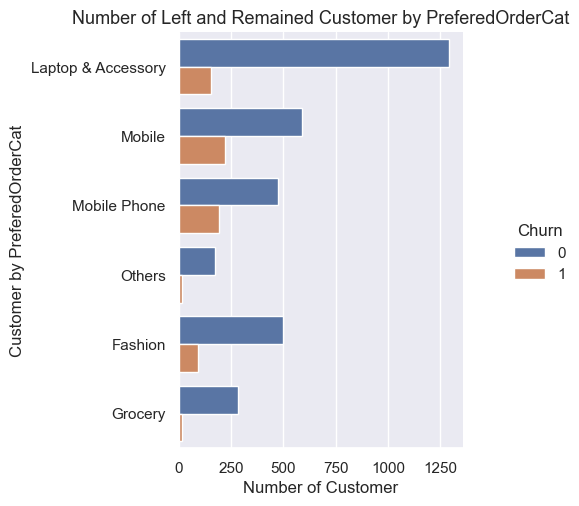

<Figure size 1000x600 with 0 Axes>

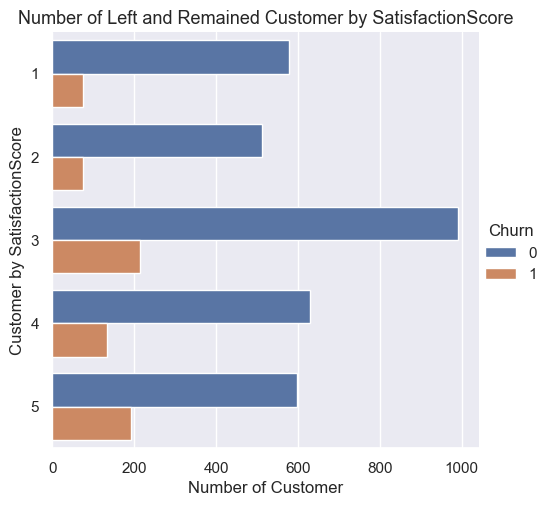

<Figure size 1000x600 with 0 Axes>

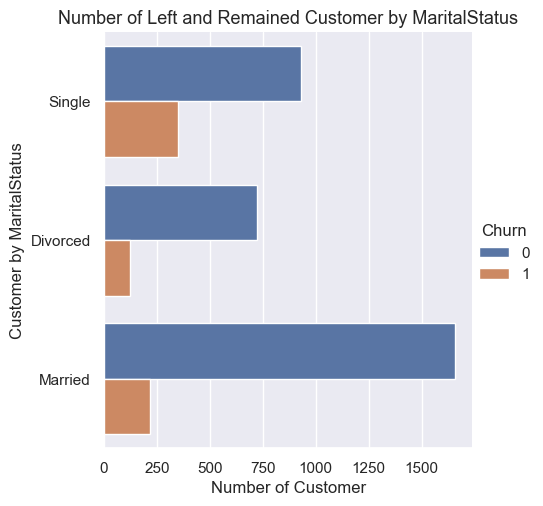

<Figure size 1000x600 with 0 Axes>

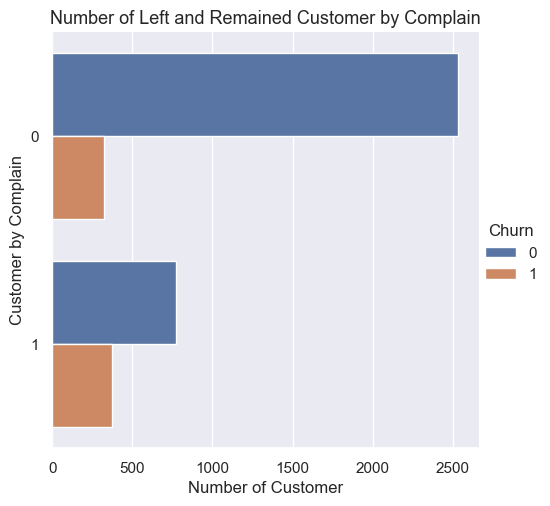

In [252]:
for categ in category_columns:
    plt.figure(figsize=(10,6))
    # seaborn catplot atau categorical plot menggunakan hue label
    sns.catplot(y=categ, kind='count', data=usecase_df, hue='Churn')
    # style plot
    plt.title('Number of Left and Remained Customer by ' + categ, fontsize=13)
    plt.ylabel('Customer by ' + categ, fontsize=12)
    plt.xlabel('Number of Customer', )
    plt.show()

plot data numerik menggunakan chart seaborn histogram
- Sebagian Besar Customer yang Churn ketika mereka baru Berlangganan dibanding dengan customer lama
- Warehouse distance to Home, sulit dipahami yang jaraknya deket kecenderungan churnnya lebih besar
- customer yang semakin banyak Coupon Used, maka cenderung akan stay lebih lama
  - sedangkan kemungkinan churn terbanyak dari yang menggunakan kurang dari 2 kupon

Istilah
- Tenure, lamanya pelanggan berlangganan berdasarkan jeda waktu transaksi

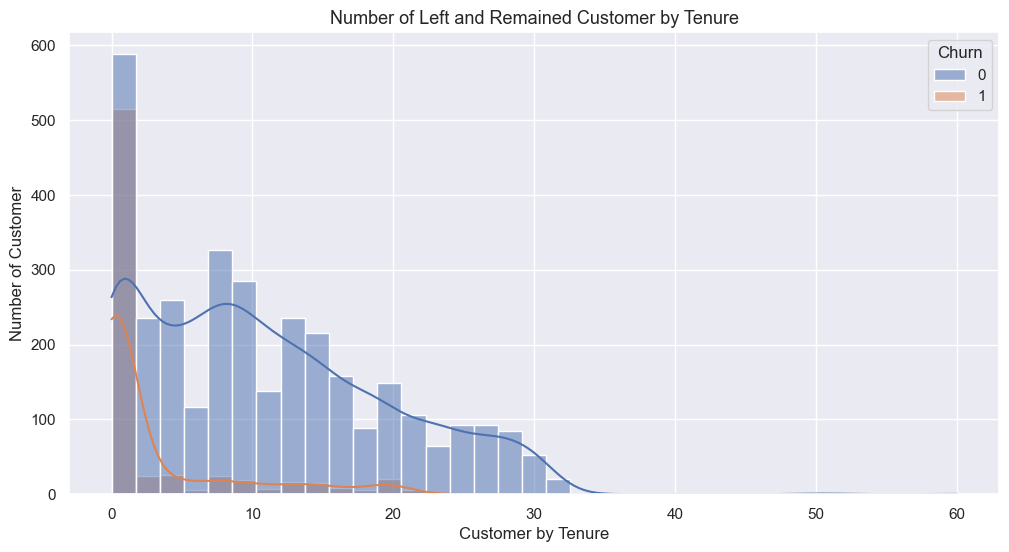

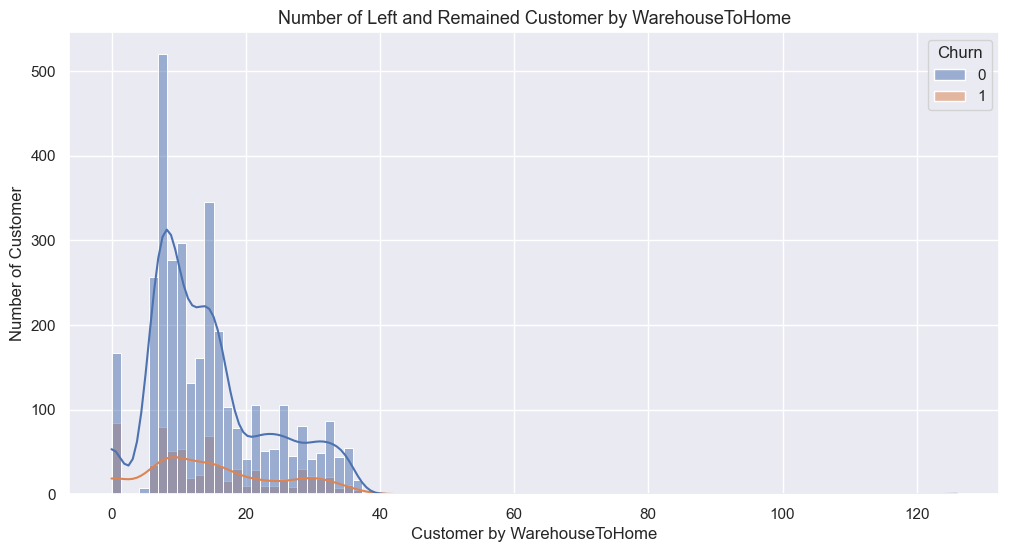

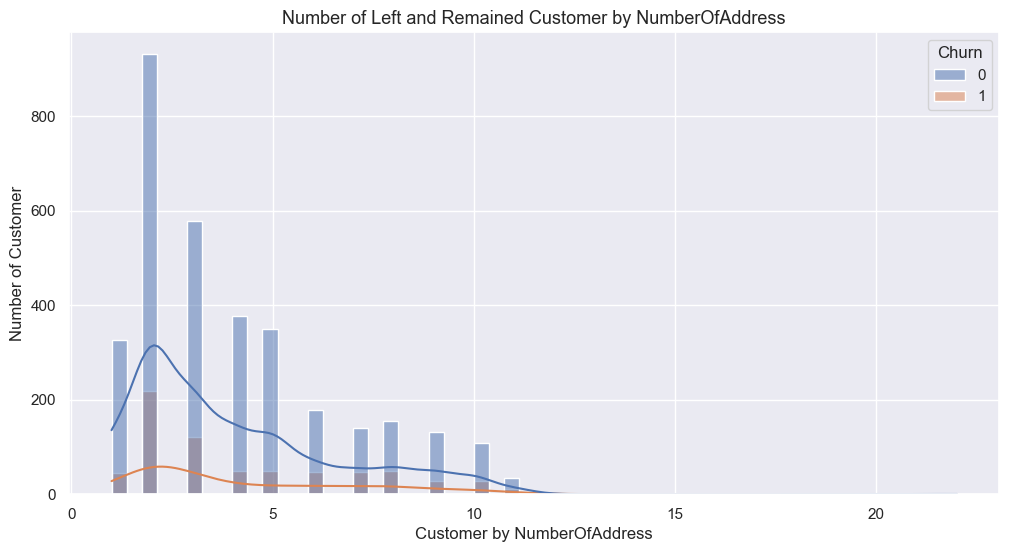

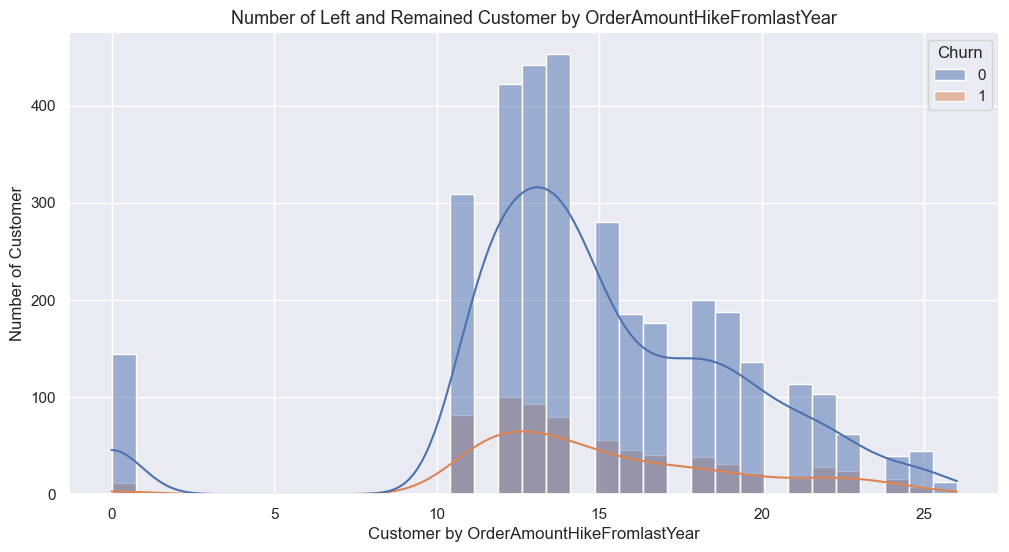

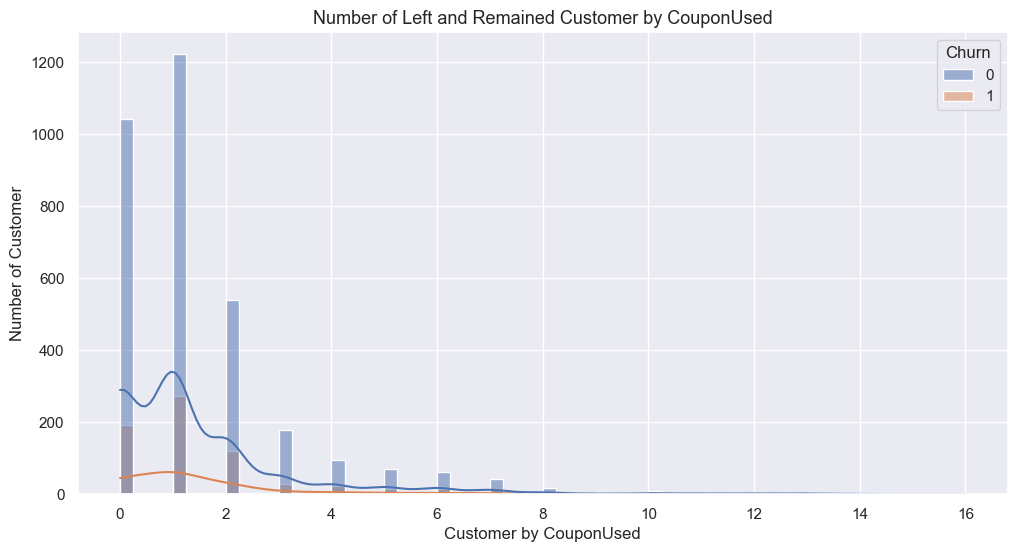

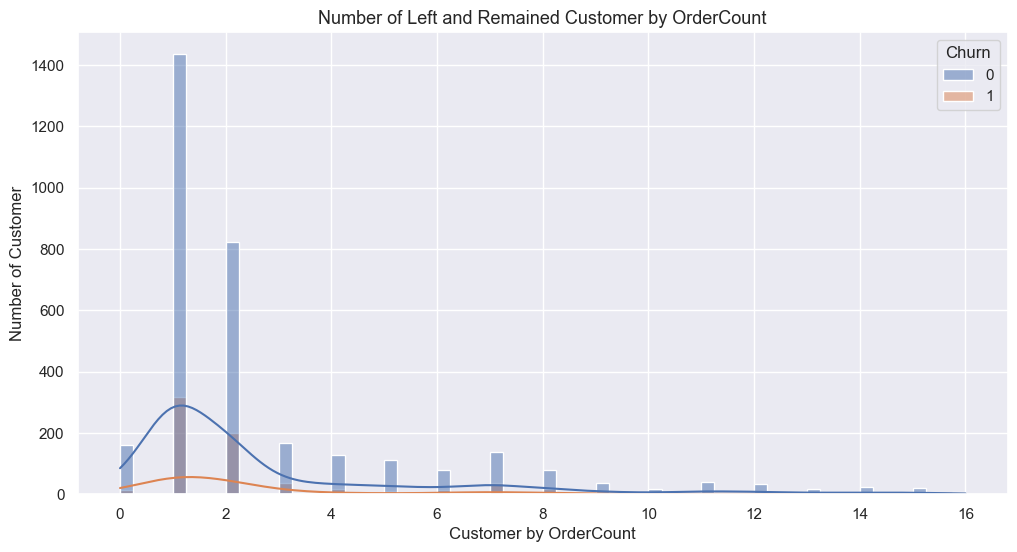

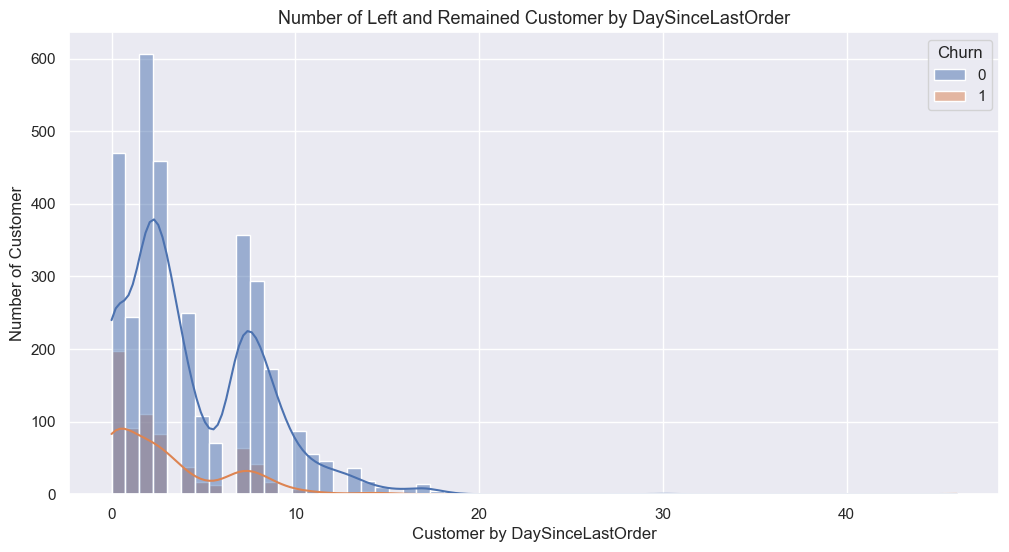

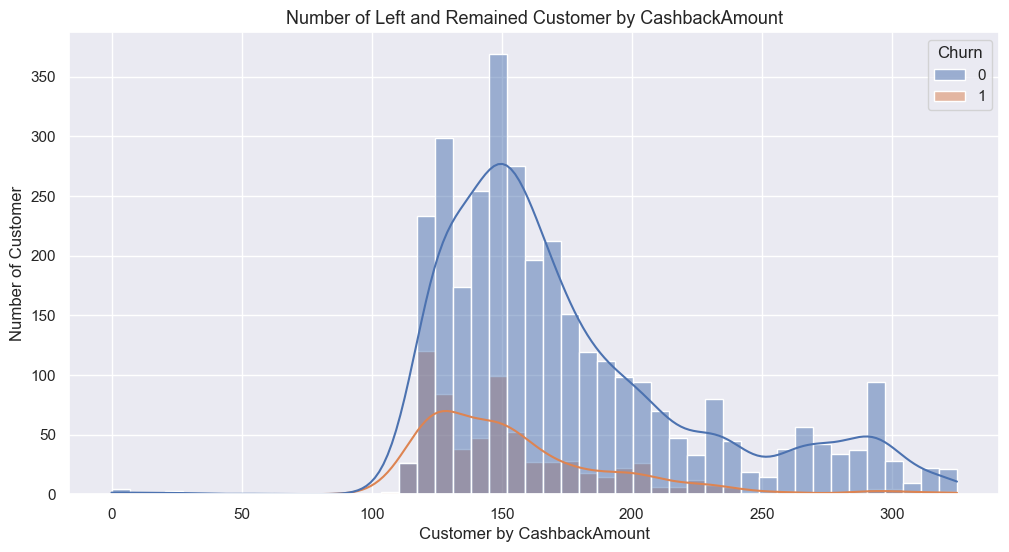

In [270]:
for col in numeric_columns:
    plt.figure(figsize=(12,6))
    # seaborn histogram plot menggunakan hue label
    sns.histplot(x=col, data=usecase_df, hue='Churn', kde=True)
    # style plot
    plt.title('Number of Left and Remained Customer by ' + col, fontsize=13)
    plt.xlabel('Customer by ' + col, fontsize=12)
    plt.ylabel('Number of Customer', fontsize=12)
    plt.show()

categorikal encoding

mengubah kolom yang sebelumnya ber-value tulisan berubah menjadi numerik
- karena untuk korelasi secara keseluruhan harus menggunakan numerik yang bisa dihitung korelasinya
- dan machine learning hanya mampu membaca inputan data yang numerik 

In [290]:
le = LabelEncoder()

# mengubah kategorikal menjadi angka biar bisa diliat korelasi semua datanya ke label
for obcol in usecase_df.columns:
    # jika tipe data merupakan object, dan bukan kolom CustomerID
    if usecase_df[obcol].dtype == 'object' and obcol != 'CustomerID':
        # maka ubah data dengan encoding menjadi kategorikal dengan angka
        usecase_df[obcol] = le.fit_transform(usecase_df[obcol])
        # print(usecase_df[obcol].unique())

[1 2 0]
[4 6 0 2 5 1 3]
[0 1]
[2 3 4 5 0 1]
[2 0 1]


melihat korelasi seluruh data feature dengan kolom label Churn

Menurut Korelasi semua variabel ke Churn, Complain yang paling menonjol korelasinya
- sama seperti penjelasan sebelumnya, ada complain memungkinkan customer untuk churn
- sedangkan variabel lainnya hampir sama jumlahnya sehingga kurang menonjol dibanding complain

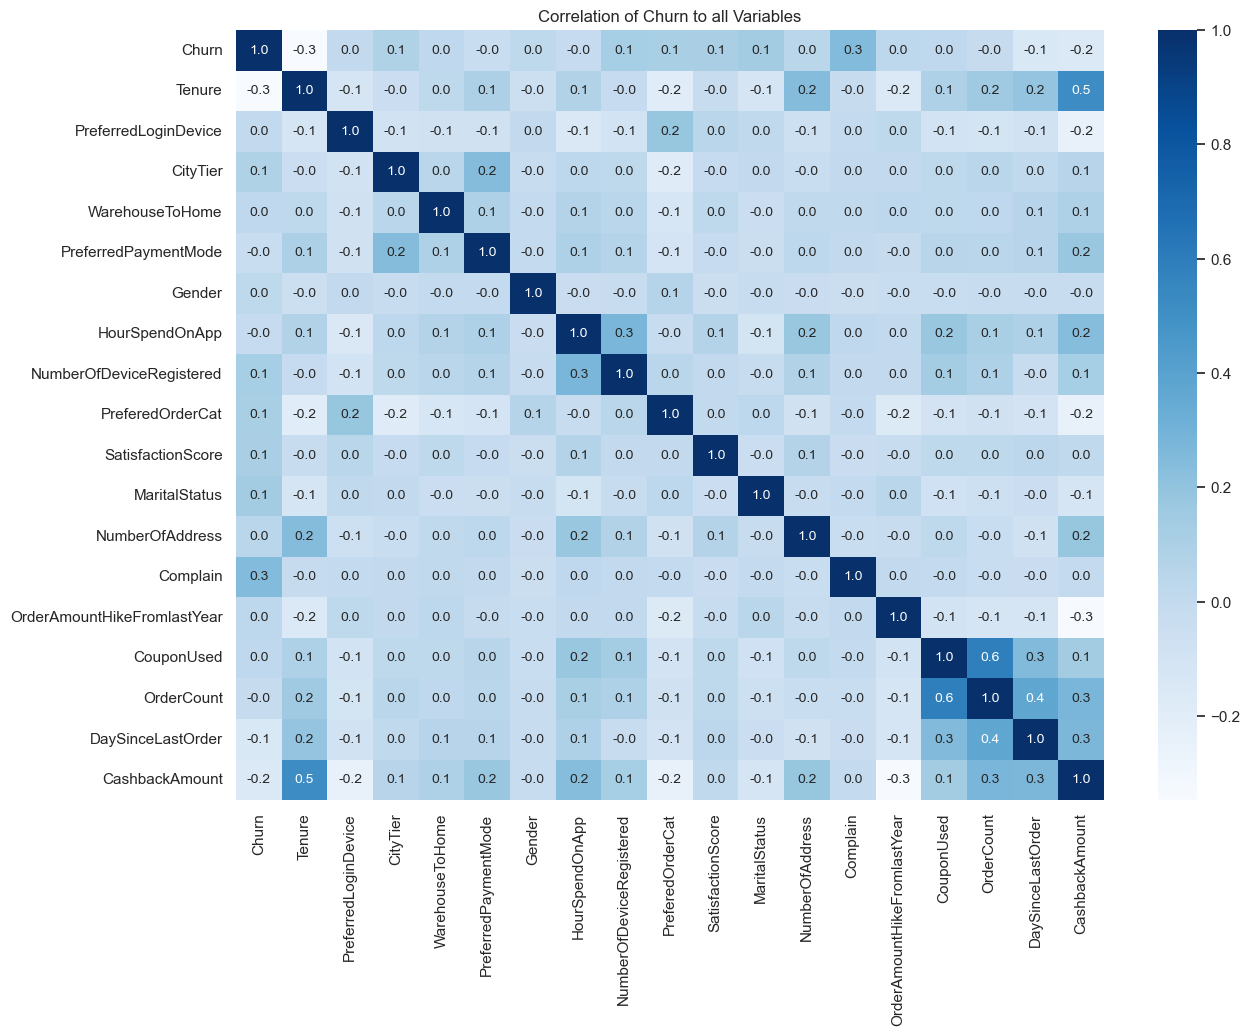

In [301]:
# kolom CustomerID tidak diperlukan, dan buat kolom khusus perhitungan korelasi
corr_data = usecase_df.drop(columns='CustomerID')
corr_data = corr_data.corr()

plt.figure(figsize=(14,10))
plt.title('Correlation of Churn to all Variables')
# tampilkan heatmap semua korelasi data
sns.heatmap(corr_data, annot=True,annot_kws={"size": 10}, cmap='Blues', fmt='.1f')
plt.show()

Train Test Split
- termasuk Data preprocessing minmax, stelah Dibagi antara Feature dan Target
- minmax scaling ke Feature agar data bernilai setara sebelum datanya dimasukan ke model
- hasil scaling jgn lupa di convert ke dataframe

In [306]:
# scaler minmax untuk standarisasi data
minmax = MinMaxScaler()

# pembagian data menjadi feature atau variabel bebas
X = usecase_df.drop(columns=['CustomerID', 'Churn'])
X_scaled = X.copy()
X_scaled = minmax.fit_transform(X_scaled)
X = pd.DataFrame(X_scaled, columns=X.columns)
# target atau variabel terikat
y = usecase_df['Churn']

# pembagian data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)

print(f'Training Features {X_train.shape[0]} Rows and {X_train.shape[1]} Columns, With Training Label {y_train.shape[0]} Rows')
print(f'Testing Features {X_test.shape[0]} Rows and {X_test.shape[1]} Columns, With Testing Label {y_test.shape[0]} Rows')

Training Features 3000 Rows and 18 Columns, With Training Label 3000 Rows
Testing Features 1000 Rows and 18 Columns, With Testing Label 1000 Rows


Confusion Matrix (Vertikal = Predicted, Horizontal = Actual)
- TP / True Positive - Positive Predicted Positive Actual (1,1), diprediksi bener karena data positif diprediksi positif
- TN / True Negative - Negative Predicted Negative Actual  (0,0), diprediksi bener karena data negatif diprediksi negatif
- FP / False Positive - Positive Predicted Negative Actual (1,0), diprediksi salah karena data yg negatif diprediksi positif
- FN / False Negative - Negative Predicted Positive Actual (0,1), diprediksi salah karena data yg positif diprediksi negatif

kalau versi python cukup liat 1 ama 0 nya, dimana 1 Positive, 0 negative
- 1 Ver = Positive Predicted, 0 Ver = Negative Predicted 
- 1 Hor = Positive Actual, 0 Hor = Negative Actual

Menggunakan model Logistic Regression Classifier

Hasil Prediksi
- 806 customer diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 63 customer diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 99 customer diprediksi hengkang (1) tenyata tidak hengkang (0)
- 32 customer diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of Logistic Regression :
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       838
           1       0.66      0.39      0.49       162

    accuracy                           0.87      1000
   macro avg       0.78      0.68      0.71      1000
weighted avg       0.85      0.87      0.85      1000



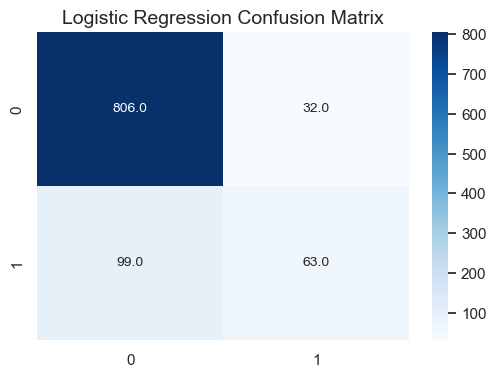

In [314]:
# memanggil model logistic regression 
loreg = LogisticRegression()
loreg.fit(X_train, y_train)
lrg_pred = loreg.predict(X_test)

# tampilkan classification report dan confusion matrix nya
print(f'Classification Report of Logistic Regression :\n{classification_report(y_test, lrg_pred)}')
# confusion matrix menggunakan heatmap
plt.figure(figsize=(6,4))
plt.title('Logistic Regression Confusion Matrix', fontsize=14)
sns.heatmap(confusion_matrix(y_test, lrg_pred),annot=True,annot_kws={"size": 10}, cmap='Blues', fmt='.1f')
plt.show()

Menggunakan model Decision Tree Classifier

Hasil Prediksi
- 786 customer diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 126 customer diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 36 customer diprediksi hengkang (1) tenyata tidak hengkang (0)
- 52 customer diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of Decision Tree : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       838
           1       0.71      0.78      0.74       162

    accuracy                           0.91      1000
   macro avg       0.83      0.86      0.84      1000
weighted avg       0.92      0.91      0.91      1000



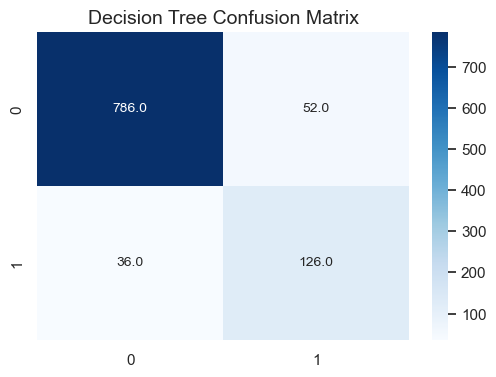

In [316]:
# memanggil model decision tree
dtreec = DecisionTreeClassifier()
dtreec.fit(X_train, y_train)
dtre_pred = dtreec.predict(X_test)

# tampilkan classification report dan confusion matrix nya
print(f'Classification Report of Decision Tree : \n{classification_report(y_test, dtre_pred)}')
# confusion matrix menggunakan heatmap
plt.figure(figsize=(6,4))
plt.title('Decision Tree Confusion Matrix', fontsize=14)
sns.heatmap(confusion_matrix(y_test, dtre_pred),annot=True,annot_kws={"size": 10}, cmap='Blues', fmt='.1f')
plt.show()

menggunakan model Random Forest Classifier

Hasil Prediksi
- 820 customer diprediksi menetap benar (0) jika mereka benar-benar menetap (0)
- 123 customer diprediksi hengkang benar (1) jika mereka benar-benar hengkang (1)
- 39 customer diprediksi hengkang (1) tenyata tidak hengkang (0)
- 13 customer diprediksi tidak hengkang (0) tenyata hengkang (1)

Classification Report of Random Forest :
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       838
           1       0.87      0.76      0.81       162

    accuracy                           0.94      1000
   macro avg       0.91      0.87      0.89      1000
weighted avg       0.94      0.94      0.94      1000



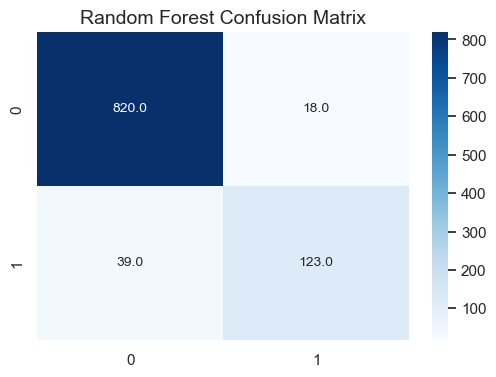

In [317]:
# memanggil model random forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# tampilkan classification report
print(f'Classification Report of Random Forest :\n{classification_report(y_test, rfc_pred)}')
# confusion matrix menggunakan heatmap
plt.figure(figsize=(6,4))
plt.title('Random Forest Confusion Matrix', fontsize=14)
sns.heatmap(confusion_matrix(y_test, rfc_pred),annot=True,annot_kws={"size": 10}, cmap='Blues', fmt='.1f')
plt.show()

perbandingan performa model classifier

In [318]:
# accuracy dari masing-masing model
lrg_acc = accuracy_score(y_test, lrg_pred)
dtre_acc = accuracy_score(y_test, dtre_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)

# masukan ke dataframe model score, untuk dibandingkan hasilnya
model_score = pd.DataFrame({'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                            'Score' : [lrg_acc, dtre_acc, rfc_acc]})
model_score.sort_values(by='Score',ascending=False, inplace=True)
model_score.round(2)

,Model,Score
2,Random Forest,0.94
1,Decision Tree,0.91
0,Logistic Regression,0.87


Coefficient/ Featue Importance yang merupakan fitur terpenting dari tiap model

Mengacu pada Model performa terbaik, fitur terpenting yang berpengaruh terhadap model yaitu
- Tenure
  - lamanya customer berlangganan berpengaruh 
  - masa dimana customer beradaptasi dan mencicipi produk
- Daysincelastorder
  - perhitungan hari sejak pemesanan terakhir berpengaruh
  - mungkin menghitung berapa lama customer akan kembali mengorder
- CashbackAmount
  - jumlah cashback berpengaruh, karena customer umumnya suka membeli barang dengan harga murah
  - customer akan senang membeli produk, ketika membeli dapet duit kembali
- WarehouseToHome
  - jarak customer pada gudang seharusnya tidak berdampak pada keputusan customer untuk hengkang

In [326]:
# Coefficient dari Logistic Regression Classifier
loreg_imp = pd.DataFrame({'Columns':X.columns, 'Feature Importances':loreg.coef_[0]})
loreg_imp.sort_values(by='Feature Importances', ascending=False, inplace=True)
loreg_imp.round(3).head(10)

,Columns,Feature Importances
11,NumberOfAddress,2.690
12,Complain,1.664
7,NumberOfDeviceRegistered,1.633
14,CouponUsed,1.190
9,SatisfactionScore,1.065
10,MaritalStatus,1.063
15,OrderCount,1.002
8,PreferedOrderCat,0.823
3,WarehouseToHome,0.691
2,CityTier,0.683


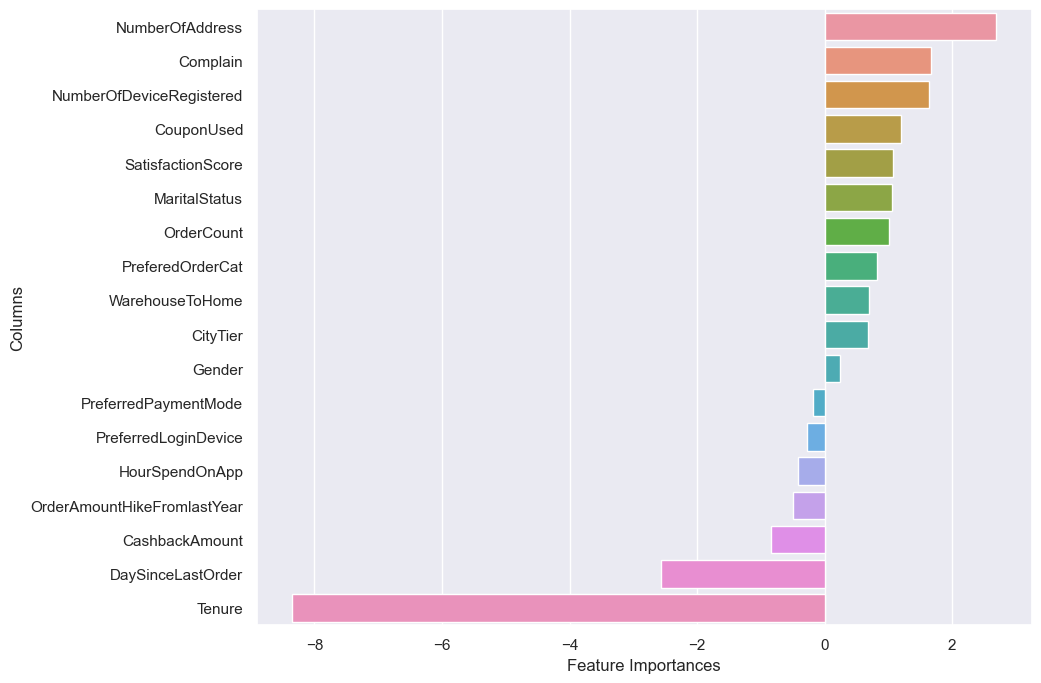

In [333]:
plt.figure(figsize=(10,8))
sns.barplot(x='Feature Importances', y='Columns', data=loreg_imp)
plt.show()

In [327]:
# Feature Importances dari Decision Tree Classifier
dtree_imp = pd.DataFrame({'Columns':X.columns, 'Feature Importances':dtreec.feature_importances_})
dtree_imp.sort_values(by='Feature Importances', ascending=False, inplace=True)
dtree_imp.round(3).head(10)

,Columns,Feature Importances
0,Tenure,0.290
16,DaySinceLastOrder,0.087
3,WarehouseToHome,0.087
11,NumberOfAddress,0.085
12,Complain,0.078
17,CashbackAmount,0.076
13,OrderAmountHikeFromlastYear,0.057
9,SatisfactionScore,0.050
2,CityTier,0.042
4,PreferredPaymentMode,0.031


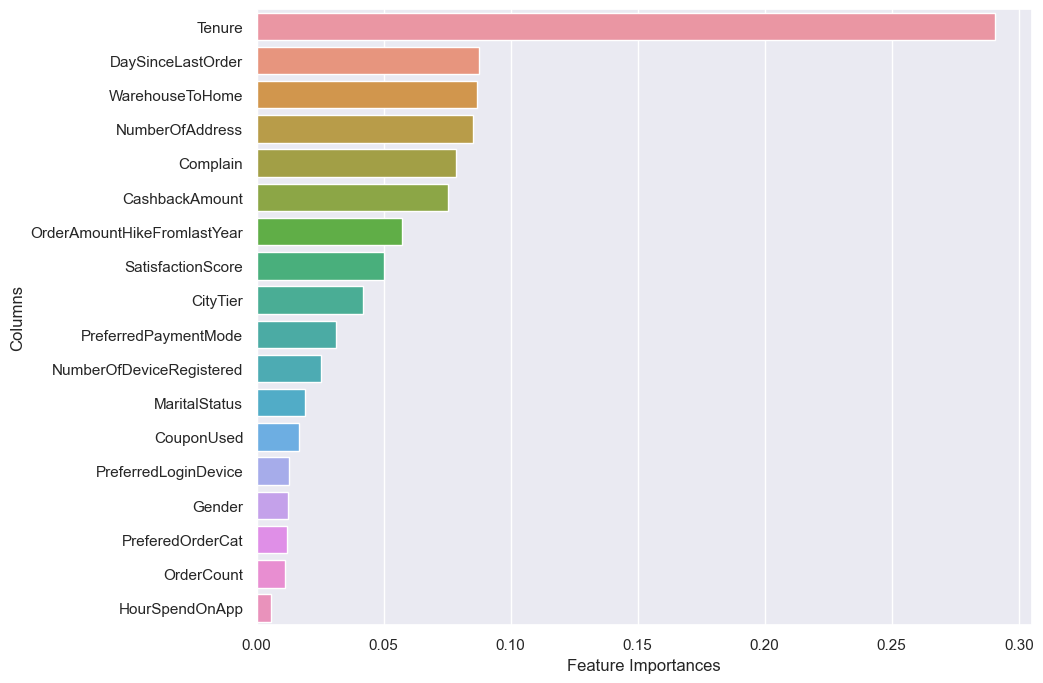

In [334]:
plt.figure(figsize=(10,8))
sns.barplot(x='Feature Importances', y='Columns', data=dtree_imp)
plt.show()

In [328]:
# Feature Importances dari Random Forest Classifier
rfc_imp = pd.DataFrame({'Columns':X.columns ,'Feature Importances':rfc.feature_importances_})
rfc_imp.sort_values(by='Feature Importances', ascending=False, inplace=True)
rfc_imp.round(3).head(10)

,Columns,Feature Importances
0,Tenure,0.216
17,CashbackAmount,0.086
3,WarehouseToHome,0.079
12,Complain,0.069
11,NumberOfAddress,0.065
16,DaySinceLastOrder,0.063
13,OrderAmountHikeFromlastYear,0.056
9,SatisfactionScore,0.048
10,MaritalStatus,0.043
4,PreferredPaymentMode,0.042


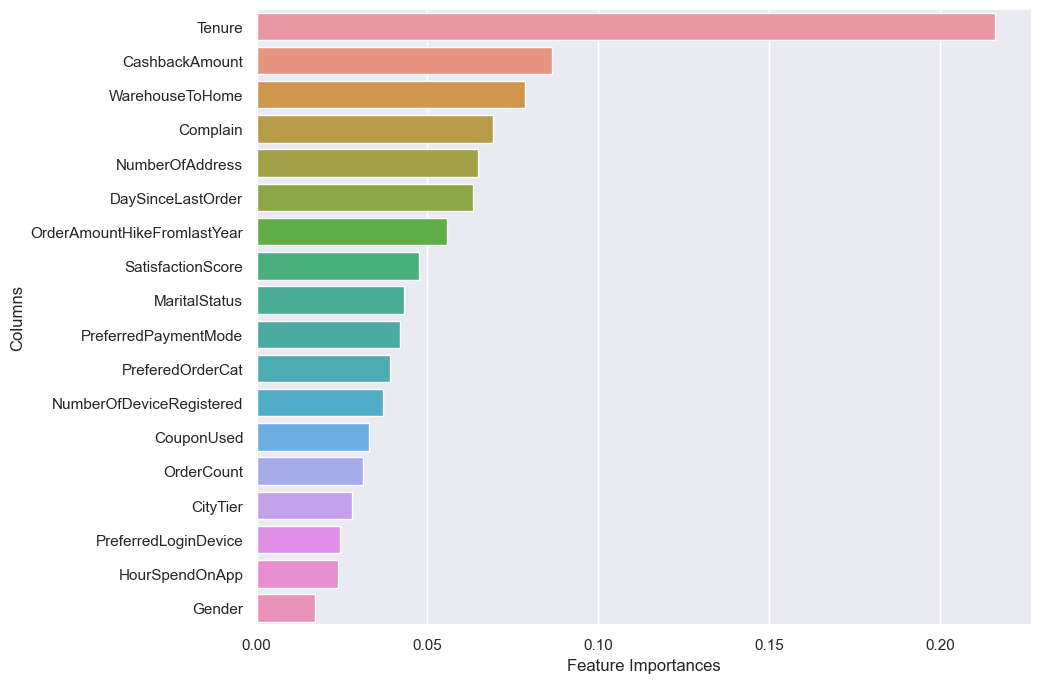

In [335]:
plt.figure(figsize=(10,8))
sns.barplot(x='Feature Importances', y='Columns', data=rfc_imp)
plt.show()

Model Inference ke data realcase

penerapan model dari hasil modelling pada data real case

In [337]:
realcase_df.head()

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4000,54001,31.0,Computer,1,22.0,Debit Card,Male,3.0,4,Grocery,3,Married,4,1,15.0,NaN,3.0,3.0,283
4001,54002,1.0,Computer,1,21.0,Credit Card,Female,3.0,4,Mobile Phone,3,Single,3,0,17.0,2.0,2.0,1.0,140
4002,54003,1.0,Mobile Phone,2,25.0,UPI,Male,3.0,2,Mobile Phone,5,Married,2,0,18.0,2.0,2.0,1.0,155
4003,54004,1.0,Phone,2,20.0,UPI,Male,3.0,5,Mobile Phone,5,Married,6,1,16.0,2.0,3.0,1.0,148
4004,54005,19.0,Computer,3,9.0,Debit Card,Female,4.0,4,Laptop & Accessory,3,Married,6,0,23.0,4.0,6.0,8.0,177


In [336]:
realcase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 4000 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   1630 non-null   int64  
 1   Tenure                       1630 non-null   float64
 2   PreferredLoginDevice         1630 non-null   object 
 3   CityTier                     1630 non-null   int64  
 4   WarehouseToHome              1630 non-null   float64
 5   PreferredPaymentMode         1630 non-null   object 
 6   Gender                       1630 non-null   object 
 7   HourSpendOnApp               1630 non-null   float64
 8   NumberOfDeviceRegistered     1630 non-null   int64  
 9   PreferedOrderCat             1630 non-null   object 
 10  SatisfactionScore            1630 non-null   int64  
 11  MaritalStatus                1630 non-null   object 
 12  NumberOfAddress              1630 non-null   int64  
 13  Complain       

pemrosesan data target sama seperti data label yang sebelumnya dilakukan pada data training sebelum modelling

In [342]:
X_real = realcase_df.copy()

null_data = X_real.isnull().sum().sort_values(ascending=False)
# print(f"{'[Columns]':<29} {'[Data Type]'} {'[missing values]':>15}")
# for i,row in null_data.head(7).iteritems():
#     print(f'{i:<30} {X_real[i].dtype} {row:>10} ')

null_columns = ['CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear']
for nulcol in null_columns:
    X_real[nulcol] = X_real[nulcol].fillna(0)

X_real['CustomerID'] = 'CUST' + X_real['CustomerID'].astype(str)

for col in ['HourSpendOnApp', 'CouponUsed', 'OrderCount']:
    X_real[col] = X_real[col].astype(int)

# mengubah kategorikal menjadi angka biar bisa diliat korelasi semua datanya ke label
for obcol in X_real.columns:
    if X_real[obcol].dtype == 'object' and obcol != 'CustomerID':
        X_real[obcol] = le.fit_transform(X_real[obcol])
        # print(X_real[obcol].unique())

X_real = X_real.drop(columns=['CustomerID'])
real_scaled = X_real.copy()
real_scaled = minmax.fit_transform(real_scaled)
X_real = pd.DataFrame(real_scaled, columns=X_real.columns)

Masukan hasil prediksi dari model sebelumnya ke data baru

In [341]:
# masukan hasil prediksi ke kolom label baru di data real
churn_predict = rfc.predict(X_real)
realcase_df.insert(1, 'Churn', churn_predict)
# tampilkan data real dengan label prediksi
realcase_df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4000,54001,0,31.0,Computer,1,22.0,Debit Card,Male,3.0,4,Grocery,3,Married,4,1,15.0,NaN,3.0,3.0,283
4001,54002,0,1.0,Computer,1,21.0,Credit Card,Female,3.0,4,Mobile Phone,3,Single,3,0,17.0,2.0,2.0,1.0,140
4002,54003,1,1.0,Mobile Phone,2,25.0,UPI,Male,3.0,2,Mobile Phone,5,Married,2,0,18.0,2.0,2.0,1.0,155
4003,54004,1,1.0,Phone,2,20.0,UPI,Male,3.0,5,Mobile Phone,5,Married,6,1,16.0,2.0,3.0,1.0,148
4004,54005,0,19.0,Computer,3,9.0,Debit Card,Female,4.0,4,Laptop & Accessory,3,Married,6,0,23.0,4.0,6.0,8.0,177
4005,54006,0,10.0,Mobile Phone,1,9.0,UPI,Female,4.0,4,Laptop & Accessory,4,Married,6,1,23.0,1.0,2.0,1.0,195
4006,54007,0,17.0,Computer,3,9.0,Debit Card,Male,4.0,4,Laptop & Accessory,1,Married,3,0,21.0,6.0,8.0,8.0,182
4007,54008,0,1.0,Computer,1,12.0,Debit Card,Female,3.0,4,Mobile Phone,1,Single,2,1,15.0,2.0,2.0,3.0,149
4008,54009,0,3.0,Computer,1,27.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,3,0,14.0,2.0,4.0,11.0,163
4009,54010,0,6.0,Computer,3,17.0,E wallet,Male,4.0,4,Laptop & Accessory,1,Single,10,0,14.0,2.0,2.0,1.0,171
